In [ ]:
#supervised learning

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
iris =  datasets.load_iris()
iris_features = iris.data
iris_target = iris.target

In [3]:
iris_df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['target'] = iris.target_names[iris.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
#estimator sklearn

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
flower_classifier = KNeighborsClassifier(n_neighbors=3)

In [8]:
iris_features[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
flower_classifier.fit(X=iris_features, y=iris_target )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
new_flower1 = np.array([[5.1,3.0,1.1,0.5]])
new_flower2 = np.array([[6.0,2.9,4.5,1.1]])

In [14]:
flower_classifier.predict(new_flower1)

array([0])

In [15]:
flower_classifier.predict(new_flower2)

array([1])

In [16]:
new_flowers = np.array([[5.1,3.0,1.1,0.5],[6.0,2.9,4.5,1.1]])
predictions = flower_classifier.predict(new_flowers)
predictions

array([0, 1])

In [17]:
#prediction of teenagers drinking habis
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
student = pd.read_csv('/content/student-por.csv')
student.rename(columns={'sex':'gender'},inplace=True)
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc'])/7
#Alcohol consumption level
student['acl'] = student['alcohol_index'] <=2
student['acl'] = student['acl'].map({True:'Low',False:'High'})

In [19]:
student.head(3)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alcohol_index,acl
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,1.000000,Low
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,1.000000,Low
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,2.285714,High


In [20]:
features = ['gender','famsize','age','studytime','famrel','goout','freetime','G3']
target = 'acl'

In [21]:
#sckitlearn only understand numbers(change it to numbers)
student['gender'] = student['gender'].map({'F':0,'M':1}).astype(int)
student['famsize'] = student['famsize'].map({'LE3':0,'GT3':1}).astype(int)
student['acl'] = student['acl'].map({'Low':0,'High':1}).astype(int)


In [22]:
X = student[features].values
y = student[target].values

In [23]:
student['acl'].value_counts(normalize=True)

0    0.744222
1    0.255778
Name: acl, dtype: float64

In [25]:
#logistics regression
from sklearn.linear_model import LogisticRegression

In [26]:
student_classifier_logreg = LogisticRegression(C=2)

In [27]:
student_classifier_logreg.fit(X,y)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
#naive biase
student['predictions_logreg'] = student_classifier_logreg.predict(X)

In [29]:
confusion_matrix = pd.crosstab(student['predictions_logreg'], student['acl'])
confusion_matrix

acl,0,1
predictions_logreg,,
0,452,105
1,31,61


In [47]:
#accuracy
ac = (confusion_matrix.loc[0,0] + confusion_matrix.loc[1,1])/student.shape[0]
print("Accuracy: {}".format(ac))

Accuracy: 0.9938366718027735


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
student_classifier_rf = RandomForestClassifier()

In [40]:
student_classifier_rf.fit(X,y)
student['prediction_rf'] = student_classifier_rf.predict(X)

In [41]:
confusion_matrix = pd.crosstab(student['prediction_rf'],student['acl'])
confusion_matrix

acl,0,1
prediction_rf,,
0,483,4
1,0,162


In [46]:
ac = (confusion_matrix.loc[0,0] + confusion_matrix.loc[1,1])/student.shape[0]
print("Accuracy: {}".format(ac))

Accuracy: 0.9938366718027735


In [48]:
new_student = np.array([[1,1,18,2,1,5,5,10]])
prediction = student_classifier_rf.predict(new_student)
print("The model predict is")
if prediction == 1:
  print("High alcoholic")
else:
  print("Low")

The model predict is
High alcoholic


In [49]:
house = pd.read_csv('/content/kc_house_data.csv')

In [51]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
features = ['bedrooms','bathrooms','condition']
target = 'price'

In [53]:
X = house[features].values
y = house[target].values
n = house.shape[0]

In [54]:
y_mean = np.mean(y)
y_mean

540088.1417665294

In [55]:
RMSE_null_model = np.sqrt(np.sum((y-y_mean)**2)/n)
RMSE_null_model

367118.7031813723

In [56]:
#regression model
from sklearn.linear_model import LinearRegression

In [57]:
regressor = LinearRegression()

In [58]:
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
house['predictions'] = regressor.predict(X)

In [60]:
y_pred = house['predictions'].values

In [61]:
RMSE_null_model = np.sqrt(np.sum((y-y_mean)**2)/n)
RMSE_null_model

367118.7031813723

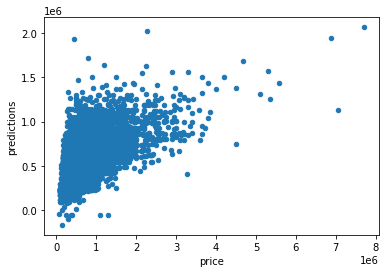

In [63]:
house.plot.scatter(x = 'price', y='predictions');

In [75]:
new_house = np.array([[1.00,1.00,3.00]])
prediction = regressor.predict(new_house)
print("price = ")
#for feature, feature_value in zip(features,feature_value):
  #if feature_value > 0:
    #print("{}:{}".format(feature,feature_value))
print("predicted value is: {:,}".format(round(prediction[0])))

price = 
predicted value is: 205,919
